In [22]:
import pandas as pd
from pylab import rcParams
import sys
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter 

dataFile = 'default-of-credit-card-clients.xls'
data = pd.read_excel(dataFile, index_col=0, header = 1)

In [23]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
row,column = data.shape
#row and column number to show shape of data
print(data.shape)
#data types of each column in the data
print(data.dtypes)
#control the data have null input or everything is clear to test
data.isnull().sum()
#Attribute Information:

#This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
#X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
#X2: Gender (1 = male; 2 = female). 
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#X4: Marital status (1 = married; 2 = single; 3 = others). 
#X5: Age (year). 
#X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
#X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
#X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

(30000, 24)
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [25]:
columnLength = data.shape[0]
rowLength = data.shape[1]
print ("Row count: " + str(rowLength) + " " + "Column count: " + str(columnLength))

Row count: 24 Column count: 30000


In [27]:
#some descriptive statistics about the data 
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
dataFiltered = data.iloc[:,0:11]
dataFiltered.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2
2,120000,2,2,2,26,-1,2,0,0,0,2
3,90000,2,2,2,34,0,0,0,0,0,0
4,50000,2,2,1,37,0,0,0,0,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,0


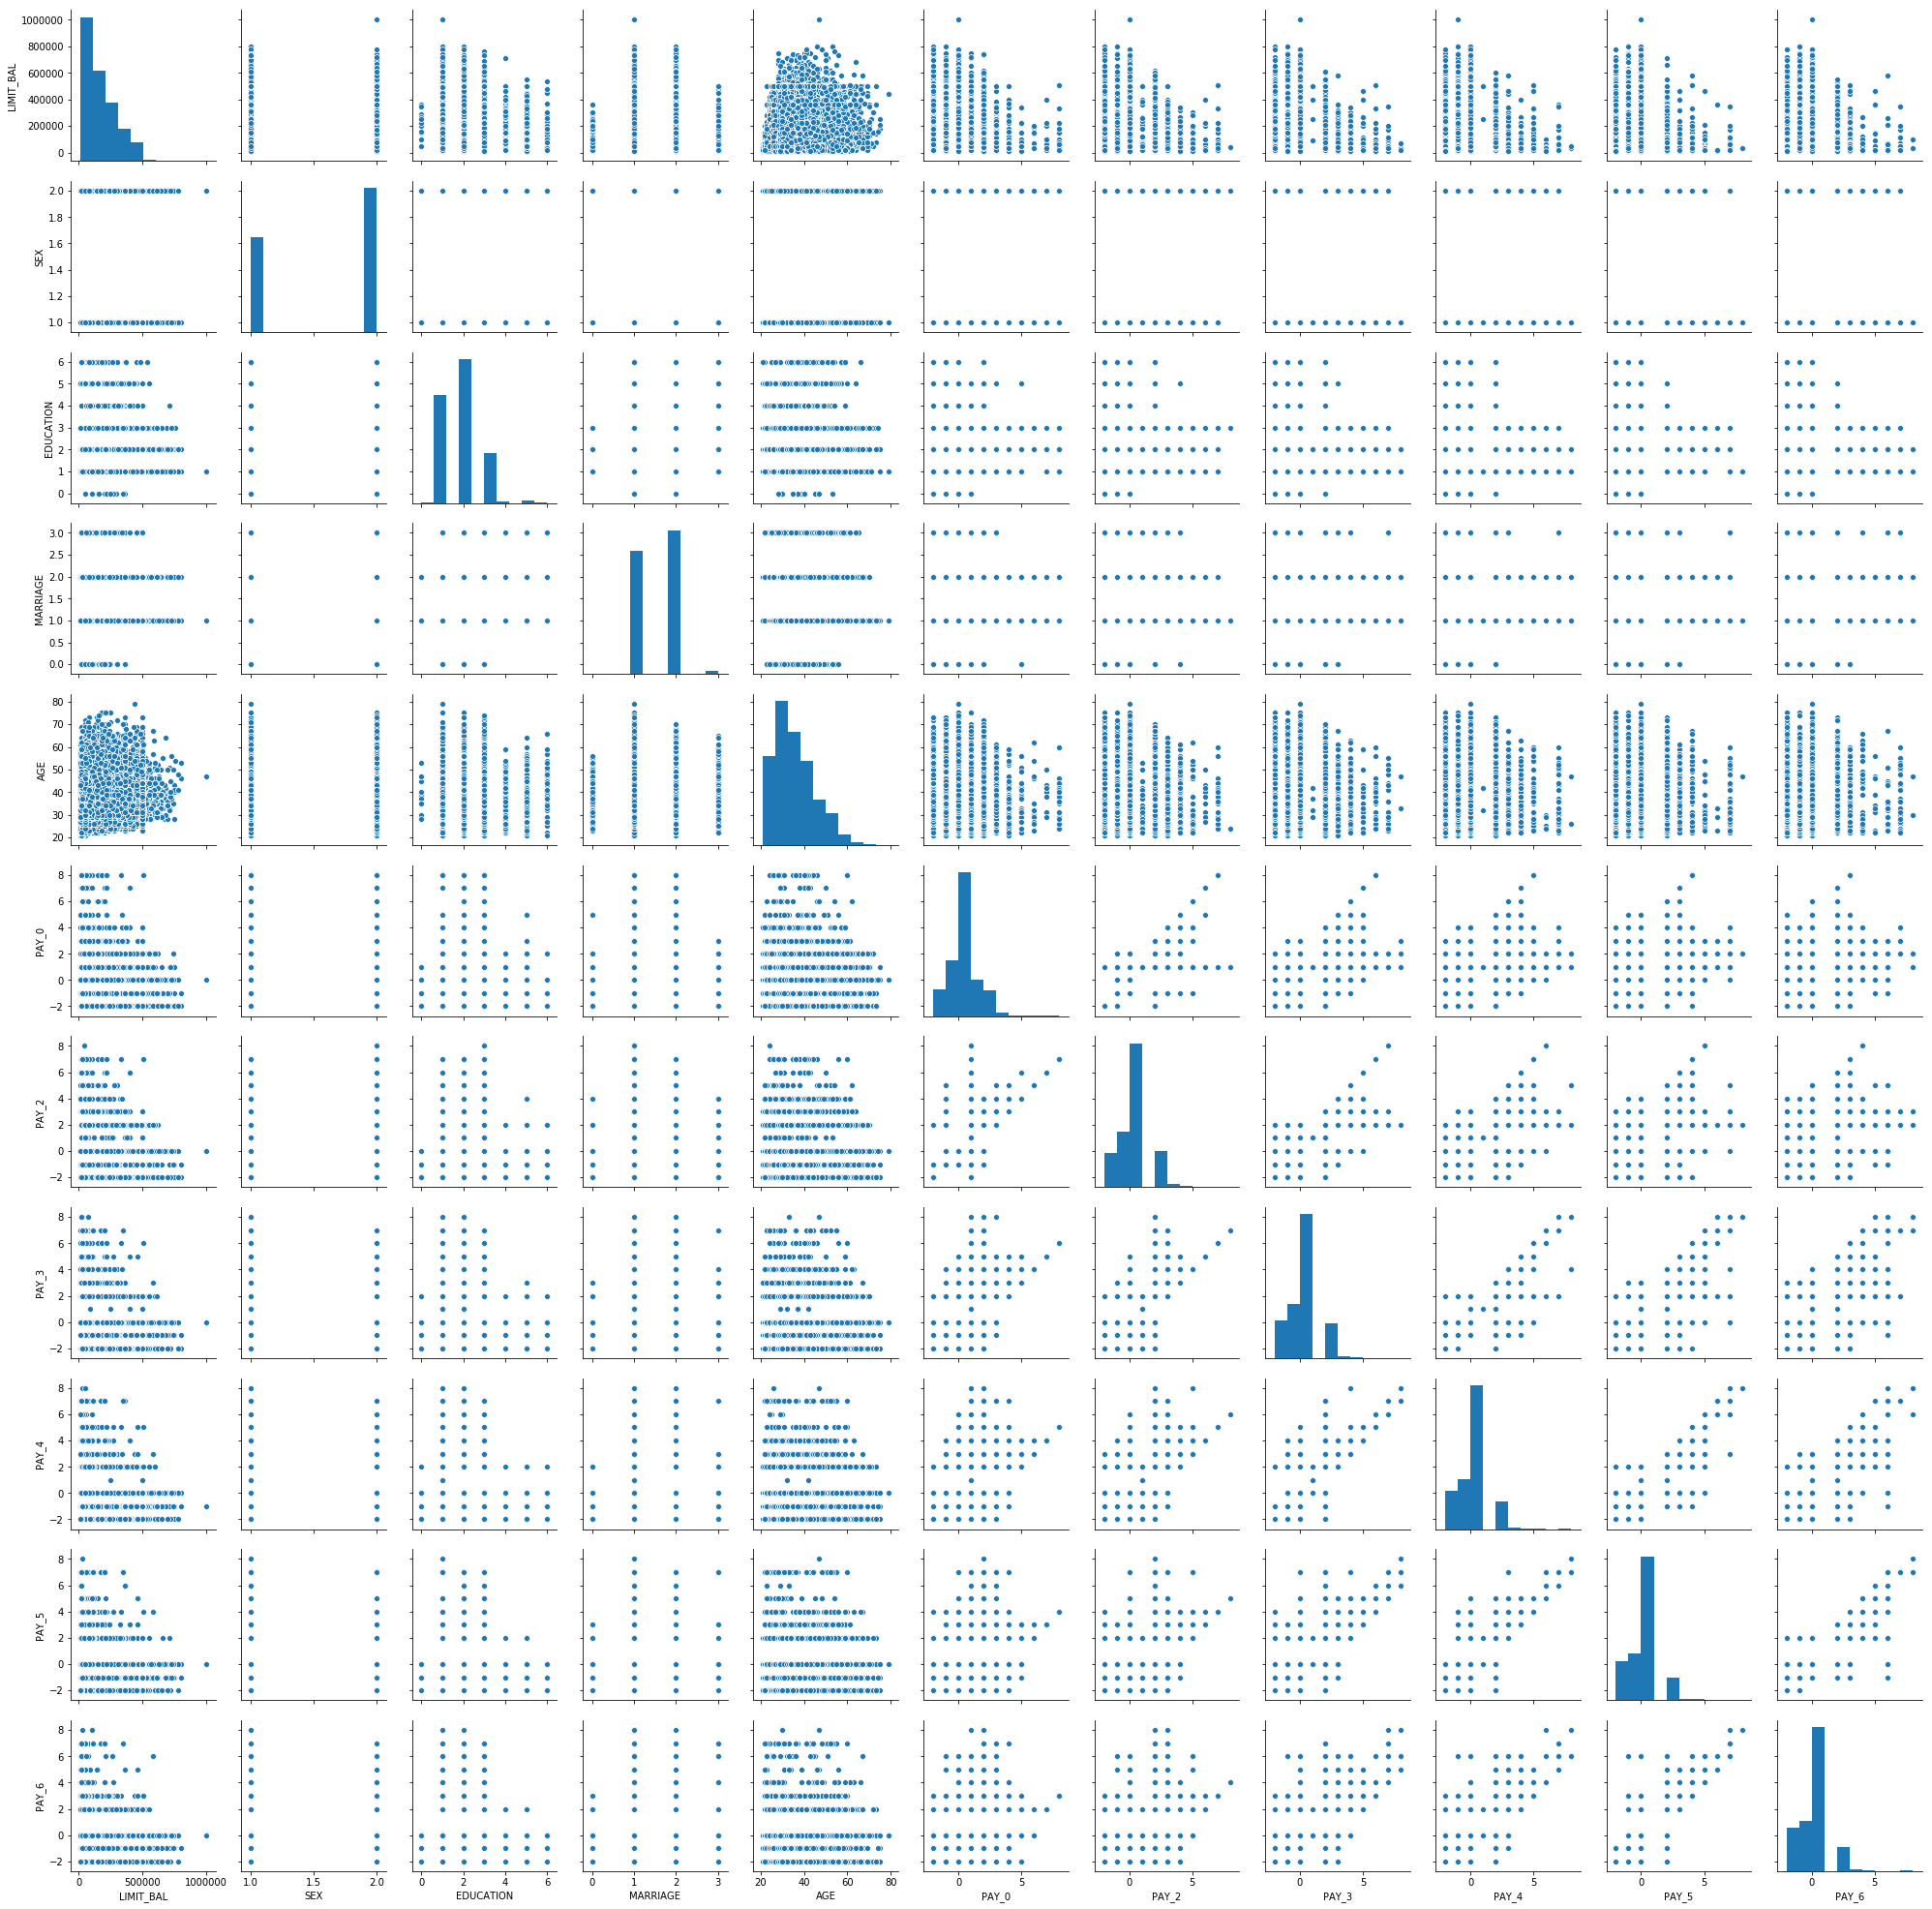

In [7]:
sb.pairplot(dataFiltered)

In [8]:
dataFiltered.corr(method ='pearson') 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900


In [9]:
#X, y = scale(dataFiltered), dataTarget

In [10]:
paymentLate1 = data["PAY_0"]
paymentLate2 = data["PAY_2"]
paymentLate3 = data["PAY_3"]
paymentLate4 = data["PAY_4"]
paymentLate5 = data["PAY_5"]
paymentLate6 = data["PAY_6"]
peymentlateMean = []
for var in range(len(paymentLate1)):
    count =0 
    divide=0
    if paymentLate1.values[var] != -1:
        count = count + paymentLate1.values[var]
    if paymentLate2.values[var] != -1:
        count = count + paymentLate2.values[var]
    if paymentLate3.values[var] != -1:
        count = count + paymentLate3.values[var]
    if paymentLate4.values[var] != -1:
        count = count + paymentLate4.values[var]
    if paymentLate5.values[var] != -1:
        count = count + paymentLate5.values[var]
    if paymentLate6.values[var] != -1:
        count = count + paymentLate6.values[var]
    count = count / 6 
    peymentlateMean.append(count)
data.insert(1,"late_payment",peymentlateMean)

In [11]:
from scipy import stats
s_df = data[(data["EDUCATION"] == 3)]
m_df = data[data["EDUCATION"] != 3]
single = s_df["default payment next month"].values
multi = m_df["default payment next month"].values
_, p_value = stats.ttest_ind(a=single, b=multi, equal_var=False)
p_value

6.383725557007037e-08

In [12]:
from scipy import stats
s_df = data[(data["late_payment"] == 0)]
m_df = data[data["late_payment"] != 0]
single = s_df["default payment next month"].values
multi = m_df["default payment next month"].values
_, p_value = stats.ttest_ind(a=single, b=multi, equal_var=False)
p_value

0.0

In [13]:
from scipy import stats
s_df = data[(data["AGE"] < 29)]
m_df = data[data["AGE"] >= 29]
single = s_df["default payment next month"].values
multi = m_df["default payment next month"].values
_, p_value = stats.ttest_ind(a=single, b=multi, equal_var=False)
p_value

0.0005450404916077929

In [14]:
data.head()

,LIMIT_BAL,late_payment,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0.000000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,0.666667,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0.000000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0.000000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,0.000000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


L score  of linear regression 0.0019198703289403651
Mean Square Error is  1.74E-01


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


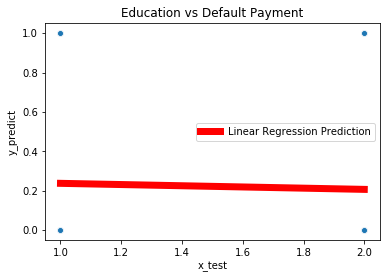

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

#print(df.head())
lr = linear_model.LinearRegression()
X = data.iloc[:,2].values
y = data.iloc[:,24].values
X=X.reshape(-1, 1) 
y=y.reshape(-1, 1)
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)
lr.fit(X_train, y_train)
print("L score  of linear regression" ,format(lr.score(X_test, y_test)))
y_predict = lr.predict(X_test)
lr_mse = mean_squared_error(y_predict, y_test)
print("Mean Square Error is " ,format(lr_mse,".2E"))
df_result= pd.DataFrame(data={ 'x_test': X_test.flatten(),'y_actual': y_test.flatten(),'y_predict': y_predict.flatten() })
sns.scatterplot(x="x_test", y="y_actual", data=df_result)
sns.lineplot(x="x_test", y="y_predict", data=df_result,color ="red", label = "Linear Regression Prediction",linewidth=7)
plt.title("Education vs Default Payment")
plt.savefig("C:/Users/asus/Desktop/CS210/" + "Linear Regression_EducationToPayment" + ".png" )
plt.show()

L score is of linear regression 0.00043246063114577016
Mean Square Error is  1.74E-01


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


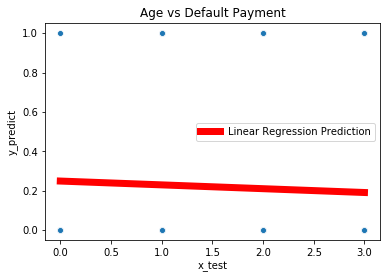

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

#print(df.head())
lr = linear_model.LinearRegression()
X = data.iloc[:,4].values
y = data.iloc[:,24].values
X=X.reshape(-1, 1) 
y=y.reshape(-1, 1)
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)
lr.fit(X_train, y_train)
print("L score is of linear regression" ,format(lr.score(X_test, y_test)))
y_predict = lr.predict(X_test)
lr_mse = mean_squared_error(y_predict, y_test)
print("Mean Square Error is " ,format(lr_mse,".2E"))
df_result= pd.DataFrame(data={ 'x_test': X_test.flatten(),'y_actual': y_test.flatten(),'y_predict': y_predict.flatten() })
sns.scatterplot(x="x_test", y="y_actual", data=df_result)
sns.lineplot(x="x_test", y="y_predict", data=df_result,color ="red", label = "Linear Regression Prediction",linewidth=7)
plt.title("Age vs Default Payment")
plt.savefig("C:/Users/asus/Desktop/CS210/" + "Linear Regression_AgeToPayment" + ".png" )
plt.show()

L score is of linear regression 0.07531660480541191
Mean Square Error is  1.61E-01


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


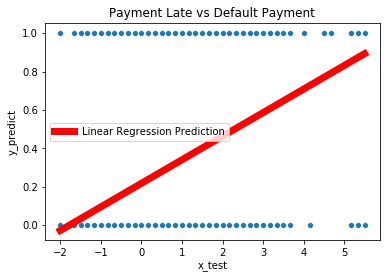

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

#print(df.head())
lr = linear_model.LinearRegression()
X = data.iloc[:,1].values
y = data.iloc[:,24].values
X=X.reshape(-1, 1) 
y=y.reshape(-1, 1)
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)
lr.fit(X_train, y_train)
print("L score is of linear regression" ,format(lr.score(X_test, y_test)))
y_predict = lr.predict(X_test)
lr_mse = mean_squared_error(y_predict, y_test)
print("Mean Square Error is " ,format(lr_mse,".2E"))
df_result= pd.DataFrame(data={ 'x_test': X_test.flatten(),'y_actual': y_test.flatten(),'y_predict': y_predict.flatten() })
sns.scatterplot(x="x_test", y="y_actual", data=df_result)
sns.lineplot(x="x_test", y="y_predict", data=df_result,color ="red", label = "Linear Regression Prediction",linewidth=7)
plt.title("Payment Late vs Default Payment")
plt.savefig("C:/Users/asus/Desktop/CS210/" + "Linear Regression_PaymentToPayment" + ".png" )
plt.show()

In [18]:
data.head()
# print shape
#print('Data Dimensionality: ' + str(data.shape))
# print attribute names
print('Attribute Names: ' + str(data.columns))
#data.head()
# print first 5 rows in your dataset
#print('Head of Data: ' + str(data.head(5)))

Attribute Names: Index(['LIMIT_BAL', 'late_payment', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [19]:
from sklearn.utils import shuffle
# Shuffle the training data
shuffled_data  = shuffle(data)
#print(shuffled_arrays)
# Split 
import numpy as np
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(shuffled_data,test_size=0.2)
print('Train Data Dimensionality: ' + str(data_train.shape))
print('Test Data Dimensionality: ' + str(data_test.shape))
#print(data_train)
#print(data_test)




Train Data Dimensionality: (24000, 25)
Test Data Dimensionality: (6000, 25)


In [20]:
# To train Decision Tree you need two variables (1) attributes (2) labels
# Split your training data to "attributes" and "labels" 
# Organize our data
label_trained  = data_train.get('default payment next month')
attributes_trained = data_train.drop(columns='default payment next month')

# Look at our data
# print(label_trained)
# print(attributes_trained)

# Train Decision tree classifiers
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=8)
dtree.fit(attributes_trained, label_trained)

dtree3 = DecisionTreeClassifier(min_samples_split=3, max_depth=8)
dtree3.fit(attributes_trained, label_trained)

dtree5 = DecisionTreeClassifier(min_samples_split=5, max_depth=8)
dtree5.fit(attributes_trained, label_trained)


from sklearn.metrics import accuracy_score


label_valid  = data_test.get('default payment next month')

attributes_valid = data_test.drop(columns='default payment next month')

train1_pred = dtree.predict(attributes_valid)
score1 = accuracy_score(label_valid,train1_pred)*100
print("score 1 = " + str(score1))

train3_pred = dtree3.predict(attributes_valid)
score3 = accuracy_score(label_valid,train3_pred)*100
print("score 3 = " + str(score3))

train5_pred = dtree5.predict(attributes_valid)
score5 = accuracy_score(label_valid,train5_pred)*100
print("score 5 = " + str(score5))









score 1 = 81.68333333333334
score 3 = 81.71666666666667
score 5 = 81.6


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(attributes_trained, label_trained)

score1 = knn.score(attributes_valid, label_valid)
print("score 1 = " + str(score1))

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(attributes_trained, label_trained)

score2 = knn2.score(attributes_valid, label_valid)
print("score 2 = " + str(score2))

knn3 = KNeighborsClassifier(n_neighbors = 7)
knn3.fit(attributes_trained, label_trained)

score3 = knn3.score(attributes_valid, label_valid)
print("score 3 = " + str(score3))

knn4 = KNeighborsClassifier(n_neighbors = 9)
knn4.fit(attributes_trained, label_trained)

score4 = knn4.score(attributes_valid, label_valid)
print("score 4 = " + str(score4))

knn5 = KNeighborsClassifier(n_neighbors = 1)
knn5.fit(attributes_trained, label_trained)

score5 = knn5.score(attributes_valid, label_valid)
print("score 5 = " + str(score5))



score 1 = 0.7355
score 2 = 0.7568333333333334
score 3 = 0.7666666666666667
score 4 = 0.7668333333333334
score 5 = 0.6936666666666667
